In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
#

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.3, random_state=777)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)


In [4]:
# Data augmentation
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=30,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

batch_size = 32
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size, shuffle=False)


In [5]:
# Model definition
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


In [6]:
# Compile model
model.compile(optimizer=Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Training
history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=val_generator,
    validation_steps=len(x_val) // batch_size,
    callbacks=[reduce_lr]
)


C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 58s 50ms/step - acc: 0.2818 - loss: 1.9357 - val_acc: 0.5008 - val_loss: 1.3572 - learning_rate: 0.0010
Epoch 2/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - acc: 0.5312 - loss: 1.5418 - val_acc: 0.3750 - val_loss: 1.5328 - learning_rate: 0.0010
Epoch 3/100
   1/1093 ━━━━━━━━━━━━━━━━━━━━ 1:32 85ms/step - acc: 0.5000 - loss: 1.4092

c:\Dev\Anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1093/1093 ━━━━━━━━━━━━━━━━━━━━ 52s 47ms/step - acc: 0.4642 - loss: 1.4607 - val_acc: 0.5546 - val_loss: 1.2130 - learning_rate: 0.0010
Epoch 4/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - acc: 0.4062 - loss: 1.3910 - val_acc: 0.4583 - val_loss: 1.3586 - learning_rate: 0.0010
Epoch 5/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 55s 50ms/step - acc: 0.5383 - loss: 1.2750 - val_acc: 0.5827 - val_loss: 1.1906 - learning_rate: 0.0010
Epoch 6/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - acc: 0.5625 - loss: 0.9833 - val_acc: 0.5000 - val_loss: 1.3236 - learning_rate: 0.0010
Epoch 7/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - acc: 0.5868 - loss: 1.1676 - val_acc: 0.6615 - val_loss: 0.9731 - learning_rate: 0.0010
Epoch 8/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - acc: 0.5938 - loss: 1.1955 - val_acc: 0.5833 - val_loss: 1.1554 - learning_rate: 0.0010
Epoch 9/100
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 55s 50ms/step - acc: 0.6144 - loss: 1.0793 - val_acc: 0.6667 - val_loss: 0.9539 - learning

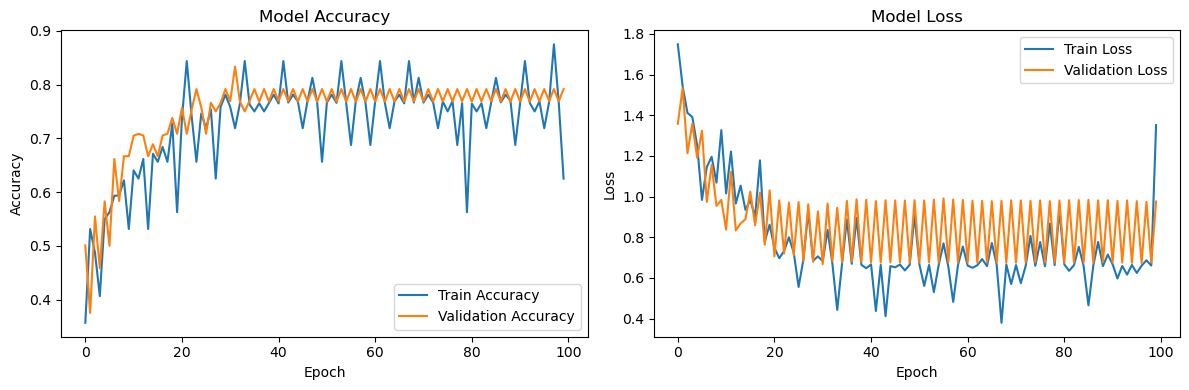

In [7]:
# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()